#**Importing library**


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install chart_studio 
import math
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [37]:
df=pd.read_csv('train.csv')

In [38]:
df.head()

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,295,94DKEP,2750102,1905204,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89
1,923,94FTOJ,703684,2707623,2041,12440,CANCELED,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,3254,94CP5P,2292525,1428994,634,3173,COMPLETED,NaN,"7215059,1428994,",0,6.0,NaN,1,58
3,1096,94D4G1,7585415,6412601,1279,7961,CANCELED,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1817,94EC6Q,1049024,6812604,1085,4242,CANCELED,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72


In [39]:
df["rating"] = df["rating"].fillna(0)

In [40]:
df.head()

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,295,94DKEP,2750102,1905204,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89
1,923,94FTOJ,703684,2707623,2041,12440,CANCELED,0.0,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,3254,94CP5P,2292525,1428994,634,3173,COMPLETED,0.0,"7215059,1428994,",0,6.0,NaN,1,58
3,1096,94D4G1,7585415,6412601,1279,7961,CANCELED,0.0,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1817,94EC6Q,1049024,6812604,1085,4242,CANCELED,0.0,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72


# Feature Extraction

In [41]:
df1=df.drop(['hashed_id',"rider_id","driver_id","rating","drivers_tried","review_requested","canceled_by","payment_type"], axis=1)

In [42]:
df1.head()

,Unnamed: 0,estimated_ride_duration,estimated_ride_distance,status,discount,estimated_fare
0,295,1010,5919,COMPLETED,44.0,89
1,923,2041,12440,CANCELED,NaN,163
2,3254,634,3173,COMPLETED,6.0,58
3,1096,1279,7961,CANCELED,NaN,112
4,1817,1085,4242,CANCELED,NaN,72


# Data Normalization`

In [43]:
df1["status"] = np.where(df["status"] == "CANCELED", 0, 1)
df2=df1
df2

,Unnamed: 0,estimated_ride_duration,estimated_ride_distance,status,discount,estimated_fare
0,295,1010,5919,1,44.0,89
1,923,2041,12440,0,NaN,163
2,3254,634,3173,1,6.0,58
3,1096,1279,7961,0,NaN,112
4,1817,1085,4242,0,NaN,72
...,...,...,...,...,...,...
3554,2998,1306,7632,0,NaN,144
3555,1993,965,4756,0,NaN,90
3556,1064,1584,10873,0,NaN,199
3557,4838,1776,10961,1,50.0,207


#**Data Wrangling**

In [44]:
df2.isnull().sum()

Unnamed: 0                    0
estimated_ride_duration       0
estimated_ride_distance       0
status                        0
discount                   1869
estimated_fare                0
dtype: int64

In [45]:
df2.duplicated().sum()

0

In [46]:
df2.dropna(axis=1,inplace=True)

In [47]:
df2.isnull().sum()

Unnamed: 0                 0
estimated_ride_duration    0
estimated_ride_distance    0
status                     0
estimated_fare             0
dtype: int64

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559 entries, 0 to 3558
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               3559 non-null   int64
 1   estimated_ride_duration  3559 non-null   int64
 2   estimated_ride_distance  3559 non-null   int64
 3   status                   3559 non-null   int32
 4   estimated_fare           3559 non-null   int64
dtypes: int32(1), int64(4)
memory usage: 125.2 KB


In [49]:
df2.head()

,Unnamed: 0,estimated_ride_duration,estimated_ride_distance,status,estimated_fare
0,295,1010,5919,1,89
1,923,2041,12440,0,163
2,3254,634,3173,1,58
3,1096,1279,7961,0,112
4,1817,1085,4242,0,72


In [50]:
df2.shape

(3559, 5)

#**Exploratory Data Analysis (EDA)**

In [51]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [52]:
import plotly.express as ex
from plotly.offline import iplot
import plotly.tools as tls
import plotly as py
import cufflinks as cf
#!pip install chart_studio
import chart_studio.plotly as py


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
configure_plotly_browser_state()
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [53]:
Total_Discount = df['discount'].sum()
Total_Driver = df['driver_id']
"rating","review_requested","canceled_by","payment_type"
print(Total_Driver.shape)
print(Total_Discount)

(3559,)
47249.0


In [54]:
df['rating'] = df['rating'].astype('int64')
rating=df['rating'].value_counts()
rating

0    2464
5     922
4      92
1      40
3      23
2      18
Name: rating, dtype: int64

In [55]:
configure_plotly_browser_state()
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
fig = px.pie(df,values=quantity,names=numbers,title="Rating % ")

fig.show()


In [56]:
configure_plotly_browser_state()

fig = px.bar(df, x=numbers, y=quantity,color=numbers,
            height=400,title="Riding Status ")
fig.show()

In [57]:
payment_type = df["payment_type"].value_counts()
payment_type

1    3504
2      55
Name: payment_type, dtype: int64

Text(0.5, 0, '1 Completed, 0 Incomplete')

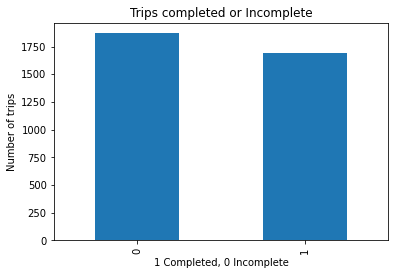

In [58]:
show = df2['status'].value_counts().plot(kind='bar', title='Trips completed or Incomplete')
show.set_ylabel('Number of trips')
show.set_xlabel('1 Completed, 0 Incomplete')

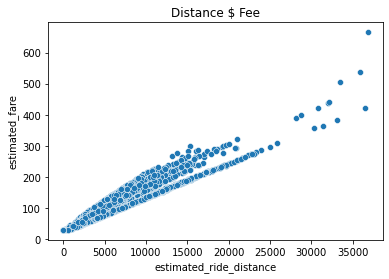

In [59]:
show2 = sns.scatterplot(x='estimated_ride_distance',
                y='estimated_fare',
                data=df2)
show2.set_title('Distance $ Fee')
plt.show()

In [60]:
# #!pip install dash --upgrade
# configure_plotly_browser_state()
# import dash_core_components as dcc
# from dash import Dash, dcc, html, Input, Output
# import plotly.express as px

# app = Dash(__name__)


# app.layout = html.Div([
#     html.H4('Interactive Plotly Express axes'),
#     html.Button("Rotate labels", n_clicks=0, 
#                 id='button'),
#     dcc.Graph(id="graph"),
# ])


# @app.callback(
#     Output("graph", "figure"), 
#     Input("button", "n_clicks"))
# def rotate_figure(n_clicks):
#     df = px.data.tips() # replace with your own data source
#     fig = px.histogram(df, x=payment_type, height=500)
#     fig.update_xaxes(tickangle=n_clicks*45)
#     return fig


# app.run_server(debug=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2936\1568382828.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


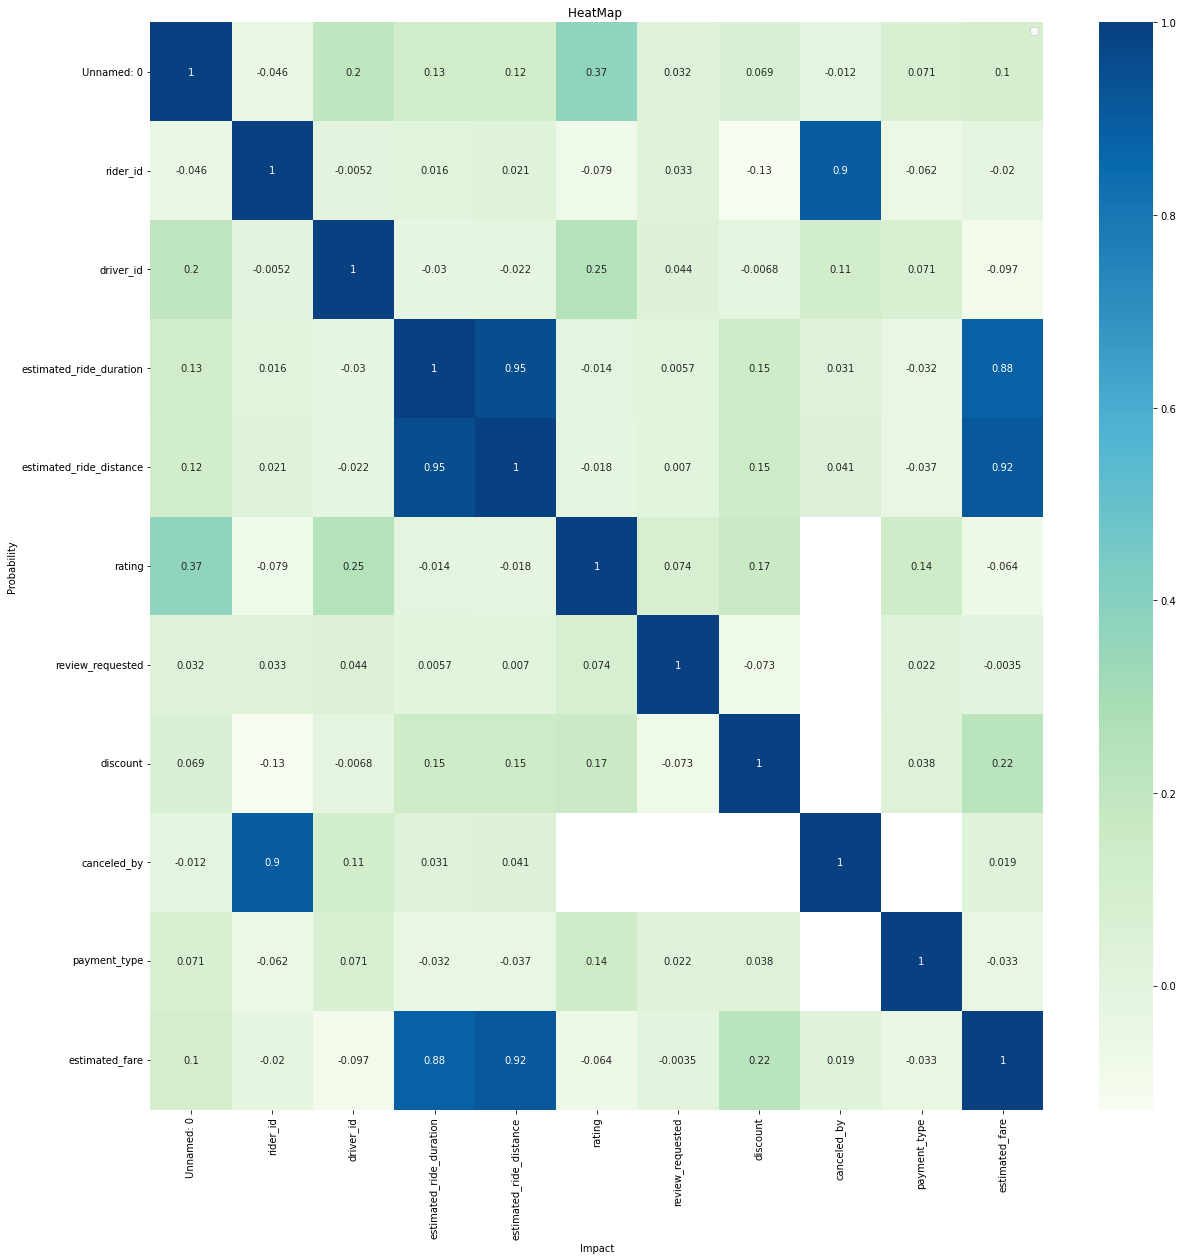

In [61]:
plt.figure(figsize=(20,20))
co=df.corr()
sns.heatmap(co,cmap="GnBu",annot=True,)
plt.xlabel("Impact")
plt.ylabel("Probability")
plt.title("HeatMap ")
plt.legend()

#**Model Building**

In [62]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets


In [63]:
df2.head()

,Unnamed: 0,estimated_ride_duration,estimated_ride_distance,status,estimated_fare
0,295,1010,5919,1,89
1,923,2041,12440,0,163
2,3254,634,3173,1,58
3,1096,1279,7961,0,112
4,1817,1085,4242,0,72


In [64]:
# x_train=df2.drop(['estimated_fare'],axis=1)
# y_train=df2['estimated_fare']

In [65]:
df2

,Unnamed: 0,estimated_ride_duration,estimated_ride_distance,status,estimated_fare
0,295,1010,5919,1,89
1,923,2041,12440,0,163
2,3254,634,3173,1,58
3,1096,1279,7961,0,112
4,1817,1085,4242,0,72
...,...,...,...,...,...
3554,2998,1306,7632,0,144
3555,1993,965,4756,0,90
3556,1064,1584,10873,0,199
3557,4838,1776,10961,1,207


In [66]:
df3=df2.drop(['Unnamed: 0',"status"], axis=1)

In [67]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3.drop(['estimated_fare'],axis='columns'),df3.estimated_fare,test_size=0.2)

In [68]:
linreg=linear_model.LinearRegression()
linreg.fit(x_train,y_train)
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(x_train, y_train)
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
r2 = r2_score(y_test, linreg.predict(x_test))
actual = y_train
predicted = y_train_pred
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)


r2 Score 0.8164967057631577
mean_squared_error 414.5085684248738
Root Mean Square Error: 20.35948350093572


In [69]:
y_pred=linreg.predict(x_test)
y_pred

array([ 34.48008537, 109.45830202,  70.27499721,  61.5177426 ,
       182.82270938, 151.63636164, 109.94634912, 183.79158848,
       193.6971808 , 167.58775516, 131.70463619, 137.45036969,
       105.67025682, 110.89005847, 172.30805981,  67.04819571,
       121.23789615, 135.41384196, 105.0588827 ,  57.42007637,
       159.39956316, 108.01343375, 107.84126064,  85.51372113,
       205.87553964, 106.88094926, 151.90004224,  94.54123572,
       165.57801428, 146.85482655, 127.4395031 , 112.24768175,
       176.4728105 , 118.17886446, 133.33750732,  90.32078008,
        83.46155139, 124.81372665,  97.47590784,  34.48008537,
       116.44551918, 112.97388559, 152.45388523,  90.32710132,
       122.2086249 , 155.48006485,  80.46222901, 127.29814468,
        89.84326979, 164.90379263, 113.97728079, 177.15422168,
       133.93181218, 180.36404778,  95.0349491 , 174.25462886,
       239.31156426, 110.55123774, 104.82585039, 118.08567158,
        70.03588045,  75.92479856, 171.26993942,  77.27

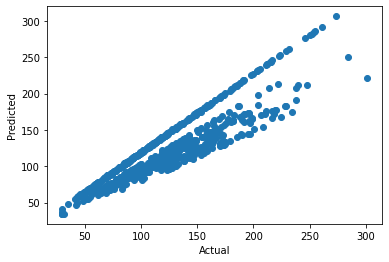

In [70]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [71]:
reg=linear_model.LinearRegression()
reg.fit(df3[['estimated_ride_duration','estimated_ride_distance',]],df3.estimated_fare)
reg.predict([[1010,5919]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([106.30977276])

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop(['estimated_fare'],axis='columns'),df3.estimated_fare,test_size=0.2)

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 
r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

MSE train: 4751.636, test: 4670.647
r2 Score 0.7057856088557066
mean_squared_error 4751.636325235637
Root Mean Square Error: 68.93211388921449


In [74]:
model.score(x_test,y_test)

0.1853932584269663

In [75]:
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train, y_train)
model.score(x_test,y_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 
r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

MSE train: 4751.636, test: 4670.647
r2 Score 0.7159975748342179
mean_squared_error 4751.636325235637
Root Mean Square Error: 68.93211388921449


In [76]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
model.predict([[1010,6000]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([89], dtype=int64)

In [78]:
model.score(x_train, y_train)

0.9954337899543378

In [79]:

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

MSE train: 4751.636, test: 4670.647
r2 Score 0.6941789874479308
mean_squared_error 4751.636325235637
Root Mean Square Error: 68.93211388921449


In [80]:
# from google.colab import files
# df3.to_csv('output.csv', encoding = 'utf-8-sig') 
# files.download('output.csv')

In [81]:

pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(x_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
print('mean_squared_error' )
print(  mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

MSE train: 397.533, test: 468.745
R^2 train: 0.841, test: 0.835
mean_squared_error
397.533421437339
r2 Score 0.6941789874479308
mean_squared_error 397.533421437339
Root Mean Square Error: 68.93211388921449


In [82]:
actual = y_train
predicted = y_train_pred 
# rsme = math.sqrt(MSE)  
# print("Root Mean Square Error:",rsme) 
r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)




r2 Score 0.6941789874479308
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [83]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [84]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train, y_train)


Lasso()

In [85]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.8405171222835474
MSE train: 397.533, test: 468.745
r2 Score 0.8348438019980927
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [86]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train, y_train)

Ridge()

In [87]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.8405171295077718
MSE train: 397.533, test: 468.745
r2 Score 0.8348435559150151
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [88]:

model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [89]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.9999206418630365
MSE train: 397.533, test: 468.745
r2 Score 0.6828874997678287
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [90]:
model=AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor()

In [91]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.8355502473039355
MSE train: 397.533, test: 468.745
r2 Score 0.8092515670301685
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [92]:
model=AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor()

In [93]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.8372671066311288
MSE train: 397.533, test: 468.745
r2 Score 0.8089176140692973
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [94]:
model=KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor()

In [95]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.8762524130712045
MSE train: 397.533, test: 468.745
r2 Score 0.8160620727543326
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [96]:
model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [97]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.9743773540110232
MSE train: 397.533, test: 468.745
r2 Score 0.8211878283994931
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


In [98]:
model=XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [99]:
model.score(x_train, y_train)
print("Model score",model.score(x_train, y_train))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
actual = y_train
predicted = y_train_pred 

r2 = r2_score(y_test, model.predict(x_test))
print("r2 Score", r2)
#print(  mean_squared_error(y_train, y_train_pred))
print('mean_squared_error',mean_squared_error(y_train, y_train_pred) )   
MSE = np.square(np.subtract(actual,predicted)).mean()   
# print(rsme)   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:",rsme)

Model score 0.949331480593015
MSE train: 397.533, test: 468.745
r2 Score 0.8229408346237377
mean_squared_error 397.533421437339
Root Mean Square Error: 19.938240179046367


# Gmail:antukhan33@gmail.com  
kaggleName :ANTU KHAN 
